In [1]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
# defeine random seed for reproducibility
np.random.seed(10)

In [3]:
train_df = pd.read_csv("data/train.csv", index_col='PassengerId')

# Data preprocessing

In [4]:
def prep_data(df):
    # Drop unwanted features
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    
    # Fill missing data: Age and Fare with the mean, Embarked with most frequent value
    df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
    df[['Fare']] = df[['Fare']].fillna(value=df[['Fare']].mean())
    df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())
    
    # Convert categorical  features into numeric
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
      
    # Convert Embarked to one-hot
    enbarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = df.drop('Embarked', axis=1)
    df = df.join(enbarked_one_hot)

    return df

In [5]:
# Prepare training data
train_df = prep_data(train_df)

In [6]:
# Features contains all columns except 'Survived'  
train_Features = train_df.drop(['Survived'], axis=1).values.astype(float)

# Label is just the 'Survived' column
train_Label = train_df['Survived'].values

In [7]:
# pre-selected paramters
batch_size = 5
epochs = 200
verbose = 2

# Training

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=train_Features.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
train_history = model.fit(x = train_Features, 
                          y = train_Label, 
                          batch_size = batch_size,
                          epochs = epochs,
                          verbose=2,
                          validation_split=0.1)


Train on 801 samples, validate on 90 samples
Epoch 1/200
 - 1s - loss: 0.6907 - accuracy: 0.6130 - val_loss: 0.5671 - val_accuracy: 0.6667
Epoch 2/200
 - 0s - loss: 0.5942 - accuracy: 0.6854 - val_loss: 0.5443 - val_accuracy: 0.7444
Epoch 3/200
 - 0s - loss: 0.5823 - accuracy: 0.6841 - val_loss: 0.5276 - val_accuracy: 0.6778
Epoch 4/200
 - 1s - loss: 0.5696 - accuracy: 0.6916 - val_loss: 0.5201 - val_accuracy: 0.7444
Epoch 5/200
 - 0s - loss: 0.5596 - accuracy: 0.7129 - val_loss: 0.5269 - val_accuracy: 0.7778
Epoch 6/200
 - 0s - loss: 0.5556 - accuracy: 0.7328 - val_loss: 0.5138 - val_accuracy: 0.7111
Epoch 7/200
 - 0s - loss: 0.5494 - accuracy: 0.7191 - val_loss: 0.5047 - val_accuracy: 0.7556
Epoch 8/200
 - 0s - loss: 0.5446 - accuracy: 0.7341 - val_loss: 0.5082 - val_accuracy: 0.7222
Epoch 9/200
 - 1s - loss: 0.5390 - accuracy: 0.7353 - val_loss: 0.4922 - val_accuracy: 0.7667
Epoch 10/200
 - 0s - loss: 0.5356 - accuracy: 0.7403 - val_loss: 0.4972 - val_accuracy: 0.7778
Epoch 11/200


Epoch 85/200
 - 0s - loss: 0.4455 - accuracy: 0.8052 - val_loss: 0.4222 - val_accuracy: 0.8222
Epoch 86/200
 - 0s - loss: 0.4420 - accuracy: 0.8102 - val_loss: 0.3898 - val_accuracy: 0.8444
Epoch 87/200
 - 0s - loss: 0.4455 - accuracy: 0.7965 - val_loss: 0.3938 - val_accuracy: 0.8444
Epoch 88/200
 - 1s - loss: 0.4422 - accuracy: 0.7978 - val_loss: 0.3724 - val_accuracy: 0.8333
Epoch 89/200
 - 1s - loss: 0.4385 - accuracy: 0.8027 - val_loss: 0.3753 - val_accuracy: 0.8333
Epoch 90/200
 - 0s - loss: 0.4389 - accuracy: 0.8127 - val_loss: 0.3730 - val_accuracy: 0.8444
Epoch 91/200
 - 0s - loss: 0.4386 - accuracy: 0.8027 - val_loss: 0.3867 - val_accuracy: 0.8556
Epoch 92/200
 - 0s - loss: 0.4450 - accuracy: 0.7990 - val_loss: 0.3754 - val_accuracy: 0.8556
Epoch 93/200
 - 0s - loss: 0.4372 - accuracy: 0.8027 - val_loss: 0.3772 - val_accuracy: 0.8444
Epoch 94/200
 - 1s - loss: 0.4369 - accuracy: 0.8140 - val_loss: 0.4270 - val_accuracy: 0.8111
Epoch 95/200
 - 0s - loss: 0.4439 - accuracy: 0.81

Epoch 171/200
 - 0s - loss: 0.4062 - accuracy: 0.8414 - val_loss: 0.3460 - val_accuracy: 0.8667
Epoch 172/200
 - 1s - loss: 0.4027 - accuracy: 0.8377 - val_loss: 0.3414 - val_accuracy: 0.8333
Epoch 173/200
 - 0s - loss: 0.3967 - accuracy: 0.8365 - val_loss: 0.3402 - val_accuracy: 0.8667
Epoch 174/200
 - 0s - loss: 0.3958 - accuracy: 0.8502 - val_loss: 0.3556 - val_accuracy: 0.8444
Epoch 175/200
 - 0s - loss: 0.4057 - accuracy: 0.8365 - val_loss: 0.3411 - val_accuracy: 0.8333
Epoch 176/200
 - 0s - loss: 0.3949 - accuracy: 0.8390 - val_loss: 0.3738 - val_accuracy: 0.8556
Epoch 177/200
 - 0s - loss: 0.3996 - accuracy: 0.8340 - val_loss: 0.3389 - val_accuracy: 0.8444
Epoch 178/200
 - 0s - loss: 0.3994 - accuracy: 0.8265 - val_loss: 0.3463 - val_accuracy: 0.8444
Epoch 179/200
 - 0s - loss: 0.4036 - accuracy: 0.8365 - val_loss: 0.3401 - val_accuracy: 0.8556
Epoch 180/200
 - 0s - loss: 0.3976 - accuracy: 0.8352 - val_loss: 0.3443 - val_accuracy: 0.8444
Epoch 181/200
 - 0s - loss: 0.4039 - acc

# Show training history

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

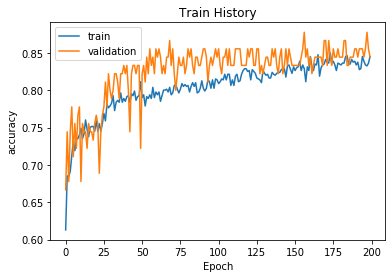

In [11]:
show_train_history(train_history,'accuracy','val_accuracy')

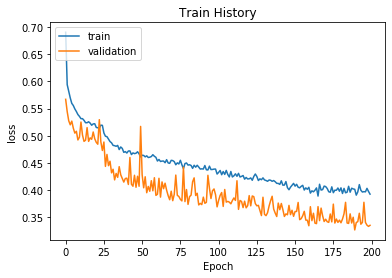

In [12]:
show_train_history(train_history,'loss','val_loss')

# Export result

In [13]:
test_df = pd.read_csv("data/test.csv", index_col='PassengerId')
test_df = prep_data(test_df)

In [14]:
# Create feature_test
feature_test = test_df.values.astype(float)

In [15]:
prediction = model.predict(feature_test)

submission = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': np.around(prediction[:,0]).astype(int),
})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('simple-submission.csv', index=False)